In [43]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Connect to the SQLite database
conn = sqlite3.connect('deathdata.db')

# Define the SQL query
query = """
SELECT 
    Year,
    SUM("Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)") AS "Neonatal Diseases"
FROM death_causes
WHERE Entity = 'World' AND Year BETWEEN 1990 AND 2018
GROUP BY Year
ORDER BY Year
"""

neonatalData = pd.read_sql(query, conn)

conn.close()


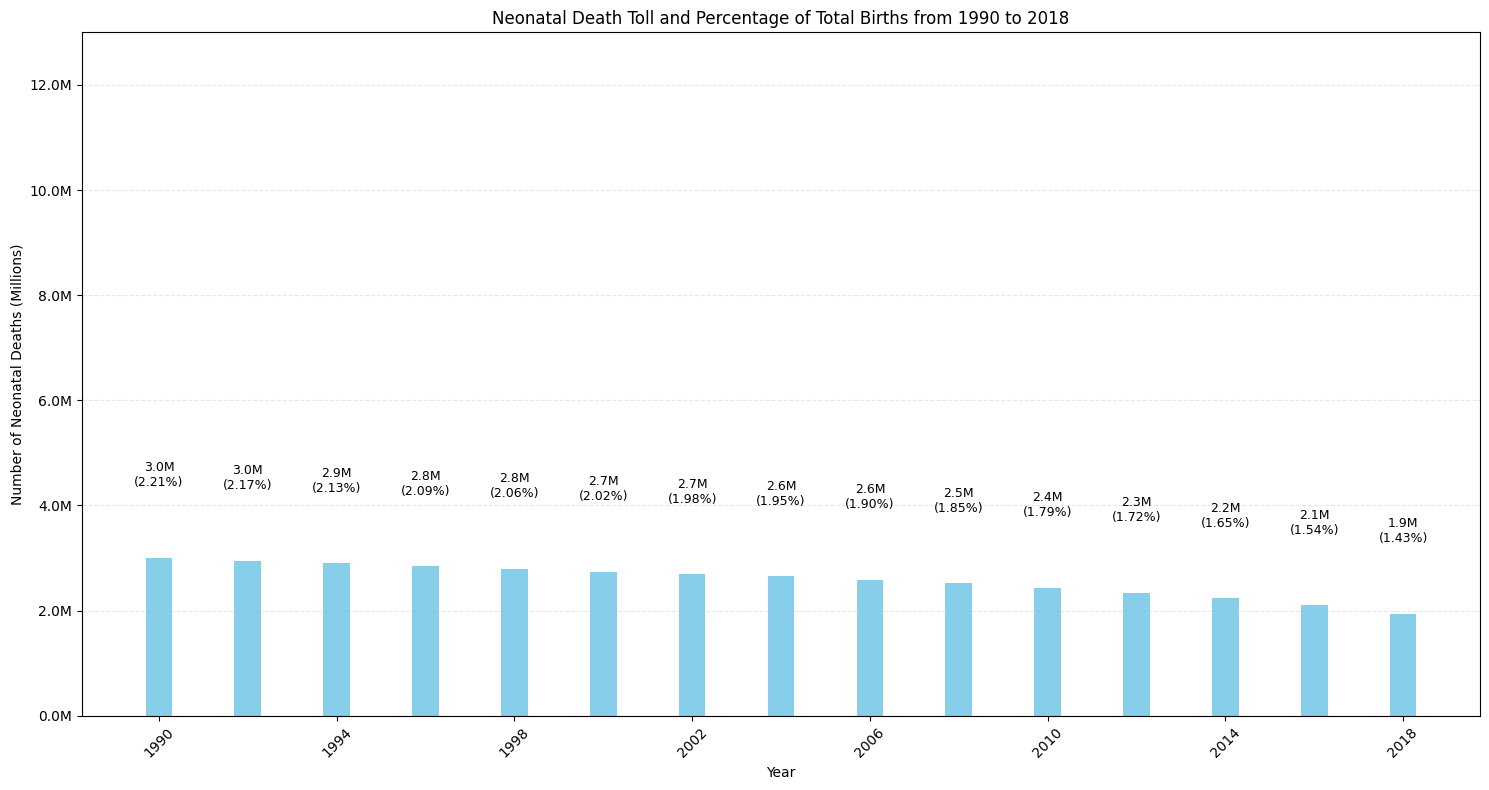

In [44]:


# Calculate the percentage of neonatal deaths out of the average number of births (136,000,000)
average_births = 136000000
max_births = 13000000

neonatalData = neonatalData[neonatalData['Year'] % 2 == 0]

neonatalData['Percentage'] = (neonatalData['Neonatal Diseases'] / average_births) * 100



# Function to format y-axis labels in millions

# Function to format y-axis labels in millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Plot the bar chart
plt.figure(figsize=(15, 8))  # Increased the figure width to spread out the bars
bars = plt.bar(neonatalData['Year'], neonatalData['Neonatal Diseases'], color='skyblue', width=0.6)  # Adjusted bar width

# Add values on top of each bar for comparison
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / average_births) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval + average_births * 0.01, f'{yval * 1e-6:.1f}M\n({percentage:.2f}%)', fontsize=9, ha='center')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Neonatal Deaths (Millions)')
plt.title('Neonatal Death Toll and Percentage of Total Births from 1990 to 2018')
xticks = neonatalData['Year'][::2]
plt.xticks(xticks, rotation=45)
plt.grid(axis='y', linestyle='--', alpha= 0.3)

# Set y-axis limits and formatter
plt.ylim(0, max_births)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.show()
